In [2]:
import pandas as pd
import scanpy as sc
import squidpy as sq
import cellcharter as cc
import numpy as np
import matplotlib.pyplot as plt
import anndata as ad

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


/Users/guoz/miniconda3/envs/cellcharter-env/lib/python3.10/site-packages/dask/dataframe/__init__.py:31: FutureWarning: The legacy Dask DataFrame implementation is deprecated and will be removed in a future version. Set the configuration option `dataframe.query-planning` to `True` or None to enable the new Dask Dataframe implementation and silence this warning.
  warnings.warn(
/Users/guoz/miniconda3/envs/cellcharter-env/lib/python3.10/site-packages/numba/core/decorators.py:246: RuntimeWarning: nopython is set for njit and is ignored
  warnings.warn('nopython is set for njit and is ignored', RuntimeWarning)
/Users/guoz/miniconda3/envs/cellcharter-env/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [ ]:
df = pd.read_csv('input_data/binary_global_BT00011.csv')

markers = ["PD1", "MHCII", "CD206", "CD45", "CD11C", "LY6G", "GRZB", "FOXP3", "CC3", 
           "CD8", "CD11B", "CD3", "LY6B2", "F480", "ASMA", "KI67", "PANCK"]

X = df[markers].values

obs = df[["sample_ID", "short_ID", "ObjectNumber", "class", "Tumor_ID", "Treatment", "slide", 
          "ROI_factor_per_tumor", "tum_factor_per_treatment"]].copy()

# Plug in Global coordinates for spatial information
spatial = df[["global_location_X", "global_location_Y"]].values

adata = ad.AnnData(X=X, obs=obs)

adata.var = pd.DataFrame(index=markers)
adata.var["marker"] = markers

adata.obsm["spatial"] = spatial

In [ ]:
adata.write("anndata/binary_global_BT00011.h5ad")

In [4]:
adata = sc.read('anndata/binary_global_BT00011.h5ad')

In [5]:
print (adata)

AnnData object with n_obs × n_vars = 153143 × 17
    obs: 'sample_ID', 'short_ID', 'ObjectNumber', 'class', 'Tumor_ID', 'Treatment', 'slide', 'ROI_factor_per_tumor', 'tum_factor_per_treatment'
    var: 'marker'
    obsm: 'spatial'


In [6]:
# Squidpy neighborhood enrichment-spatial neighbors (step 1) for the Global tumor dataset
sq.gr.spatial_neighbors(adata)

/Users/guoz/miniconda3/envs/cellcharter-env/lib/python3.10/site-packages/squidpy/pl/_spatial_utils.py:976: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  _cax = scatter(


Text(0, 0.5, 'Global Coordinate_Y')

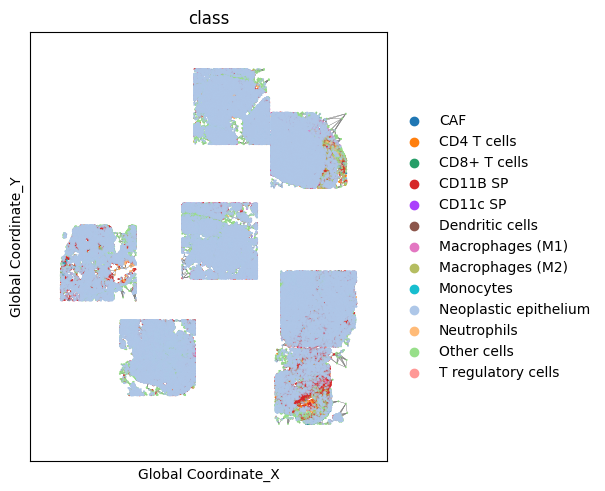

In [7]:
#check the neighborhood connectivity by scatterplot 
sq.pl.spatial_scatter(
    adata, 
    color='class', 
    shape=None,
    size=0.3,
    connectivity_key='spatial_connectivities',
    edges_width= 0.2
    )
plt.xlabel("Global Coordinate_X") 
plt.ylabel("Global Coordinate_Y") 

In [9]:
#double check cross-linking 
spatial_data = adata.obsm["spatial"]

x_min, y_min = np.min(spatial_data, axis=0)
x_max, y_max = np.max(spatial_data, axis=0)

print(f"X coordinates range from {x_min} to {x_max}")
print(f"Y coordinates range from {y_min} to {y_max}")

X coordinates range from 1597.0780866666666 to 17204.13797464706
Y coordinates range from 2084.649316 to 20827.37081157895


/Users/guoz/miniconda3/envs/cellcharter-env/lib/python3.10/site-packages/squidpy/pl/_spatial_utils.py:976: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  _cax = scatter(


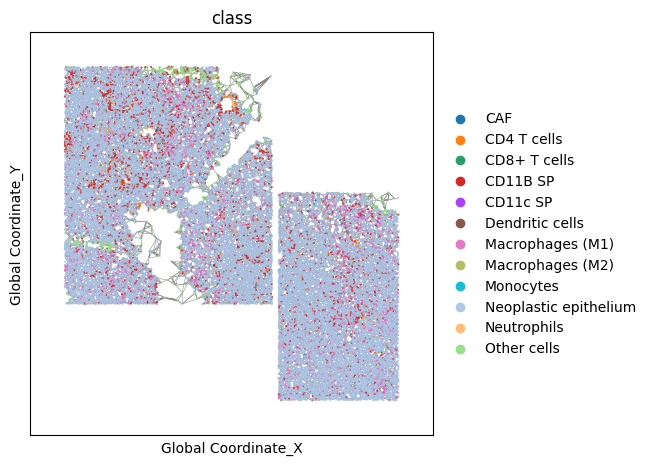

In [10]:
#Zoom in to the exact gaps between ROI
sq.pl.spatial_scatter(
    adata, 
    color='class', 
    shape=None,
    size=0.3,
    connectivity_key='spatial_connectivities',
    crop_coord=(9500, 2500,14500, 7500 ),
    edges_width= 0.2
    )
plt.xlabel("Global Coordinate_X") 
plt.ylabel("Global Coordinate_Y") 
plt.savefig("BT00011_connectivity_zoom1.png", dpi=300, bbox_inches='tight')

/Users/guoz/miniconda3/envs/cellcharter-env/lib/python3.10/site-packages/squidpy/pl/_spatial_utils.py:976: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  _cax = scatter(


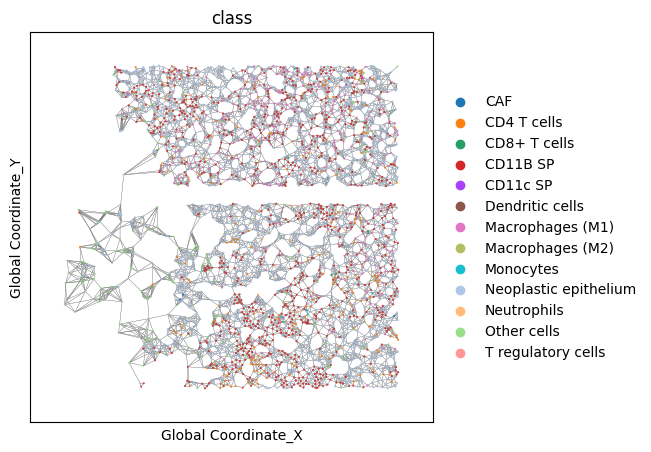

In [11]:
#Zoom in to the exact gaps between ROI
sq.pl.spatial_scatter(
    adata, 
    color='class', 
    shape=None,
    size=0.3,
    connectivity_key='spatial_connectivities',
    crop_coord=(12000,16000,15000, 18000 ),
    edges_width= 0.2
    )
plt.xlabel("Global Coordinate_X") 
plt.ylabel("Global Coordinate_Y") 
plt.savefig("BT00011_connectivity_zoom2.png", dpi=300, bbox_inches='tight')

In [12]:
cc.gr.remove_long_links(adata)

In [13]:
print(adata)

AnnData object with n_obs × n_vars = 153143 × 17
    obs: 'sample_ID', 'short_ID', 'ObjectNumber', 'class', 'Tumor_ID', 'Treatment', 'slide', 'ROI_factor_per_tumor', 'tum_factor_per_treatment'
    var: 'marker'
    uns: 'spatial_neighbors', 'class_colors'
    obsm: 'spatial'
    obsp: 'spatial_connectivities', 'spatial_distances'


/Users/guoz/miniconda3/envs/cellcharter-env/lib/python3.10/site-packages/squidpy/pl/_spatial_utils.py:976: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  _cax = scatter(


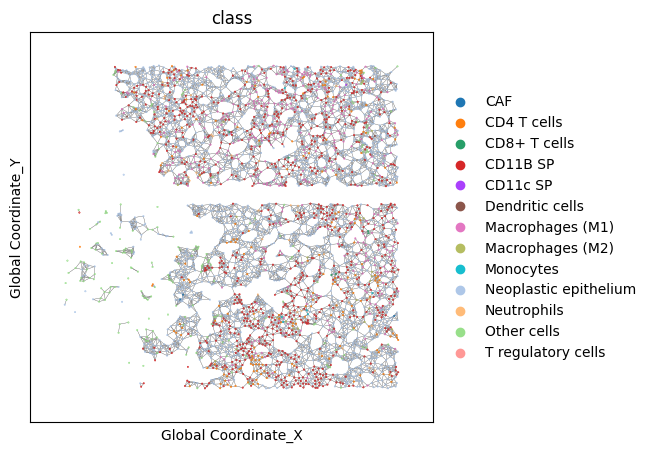

In [14]:
sq.pl.spatial_scatter(
    adata, 
    color='class', 
    shape=None,
    size=0.3,
    connectivity_key='spatial_connectivities',
    crop_coord=(12000,16000,15000, 18000 ),
    edges_width= 0.2
    )
plt.xlabel("Global Coordinate_X") 
plt.ylabel("Global Coordinate_Y") 
plt.savefig("BT00011_connectivity_zoom2new.png", dpi=300, bbox_inches='tight')

/Users/guoz/miniconda3/envs/cellcharter-env/lib/python3.10/site-packages/squidpy/pl/_spatial_utils.py:976: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  _cax = scatter(


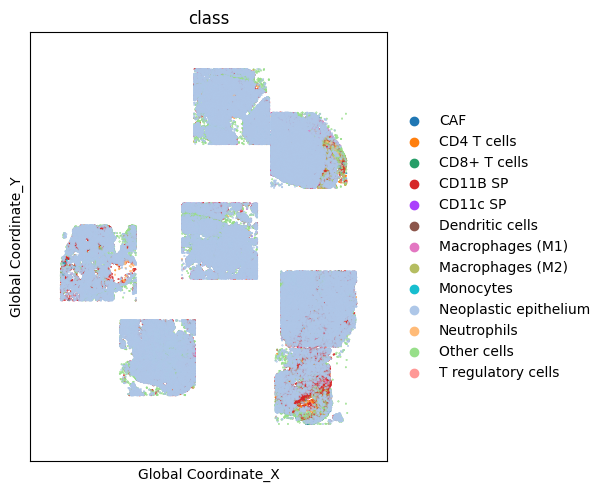

In [15]:
sq.pl.spatial_scatter(
    adata, 
    color='class', 
    shape=None,
    size=0.3,
    connectivity_key='spatial_connectivities',
    edges_width= 0.2
    )
plt.xlabel("Global Coordinate_X") 
plt.ylabel("Global Coordinate_Y") 
plt.savefig("BT00011_remove_long_conn.png", dpi=300, bbox_inches='tight')

In [16]:
cc.gr.aggregate_neighbors(adata, n_layers=3)

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 13.42it/s]


In [18]:
print (adata)

AnnData object with n_obs × n_vars = 153143 × 17
    obs: 'sample_ID', 'short_ID', 'ObjectNumber', 'class', 'Tumor_ID', 'Treatment', 'slide', 'ROI_factor_per_tumor', 'tum_factor_per_treatment'
    var: 'marker'
    uns: 'spatial_neighbors', 'class_colors'
    obsm: 'spatial', 'X_cellcharter'
    obsp: 'spatial_connectivities', 'spatial_distances'


In [19]:
gmm = cc.tl.Cluster(n_clusters=5, random_state=12345)

In [20]:
gmm.fit(adata, use_rep='X_cellcharter')

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
`Trainer.fit` stopped: `max_epochs=9` reached.
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
`Trainer.fit` stopped: `max_epochs=300` reached.
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
`Trainer.fit` stopped: `max_epochs=1` reached.
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs


Epoch 45: 100%|████████████████████████| 1/1 [00:00<00:00,  6.39it/s, nll=-199.]


In [21]:
print (adata)

AnnData object with n_obs × n_vars = 153143 × 17
    obs: 'sample_ID', 'short_ID', 'ObjectNumber', 'class', 'Tumor_ID', 'Treatment', 'slide', 'ROI_factor_per_tumor', 'tum_factor_per_treatment'
    var: 'marker'
    uns: 'spatial_neighbors', 'class_colors', '_cellcharter'
    obsm: 'spatial', 'X_cellcharter'
    obsp: 'spatial_connectivities', 'spatial_distances'


In [22]:
adata.obs['spatial_cluster'] = gmm.predict(adata, use_rep='X_cellcharter')

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs


Predicting DataLoader 0: 100%|████████████████████| 1/1 [00:00<00:00, 11.58it/s]


In [23]:
print (adata)

AnnData object with n_obs × n_vars = 153143 × 17
    obs: 'sample_ID', 'short_ID', 'ObjectNumber', 'class', 'Tumor_ID', 'Treatment', 'slide', 'ROI_factor_per_tumor', 'tum_factor_per_treatment', 'spatial_cluster'
    var: 'marker'
    uns: 'spatial_neighbors', 'class_colors', '_cellcharter'
    obsm: 'spatial', 'X_cellcharter'
    obsp: 'spatial_connectivities', 'spatial_distances'


/Users/guoz/miniconda3/envs/cellcharter-env/lib/python3.10/site-packages/squidpy/pl/_spatial_utils.py:976: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  _cax = scatter(


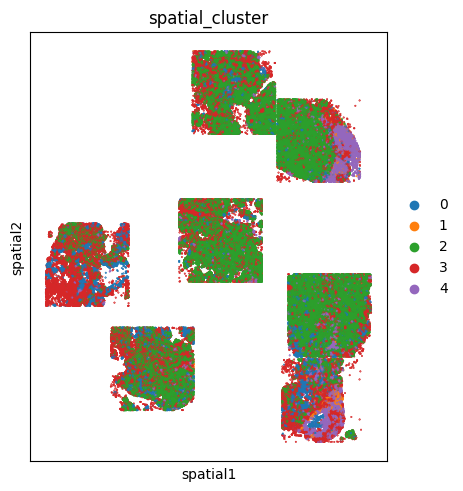

In [24]:
sq.pl.spatial_scatter(adata, shape=None, size=0.4, color="spatial_cluster")

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
`Trainer.fit` stopped: `max_epochs=9` reached.
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
`Trainer.fit` stopped: `max_epochs=300` reached.
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
`Trainer.fit` stopped: `max_epochs=1` reached.
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs


Epoch 47: 100%|████████████████████████| 1/1 [00:00<00:00,  6.38it/s, nll=-200.]

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs



Predicting DataLoader 0: 100%|████████████████████| 1/1 [00:00<00:00, 12.97it/s]


/Users/guoz/miniconda3/envs/cellcharter-env/lib/python3.10/site-packages/squidpy/pl/_spatial_utils.py:976: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  _cax = scatter(


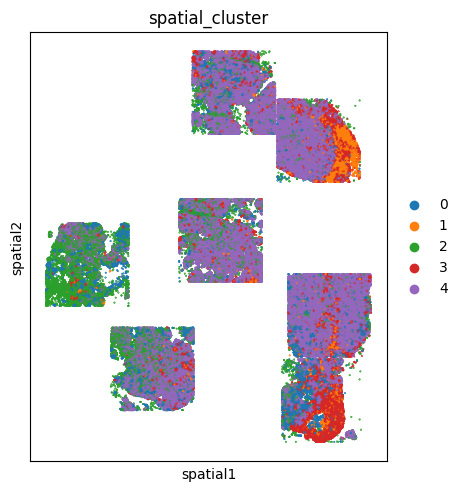

In [25]:
#check if cluster identifiers are reproducible
gmm.fit(adata, use_rep='X_cellcharter')
adata.obs['spatial_cluster'] = gmm.predict(adata, use_rep='X_cellcharter')
sq.pl.spatial_scatter(adata, shape=None, size=0.4, color="spatial_cluster")

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs


Predicting DataLoader 0: 100%|████████████████████| 1/1 [00:00<00:00, 12.08it/s]


/Users/guoz/miniconda3/envs/cellcharter-env/lib/python3.10/site-packages/squidpy/pl/_spatial_utils.py:976: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  _cax = scatter(


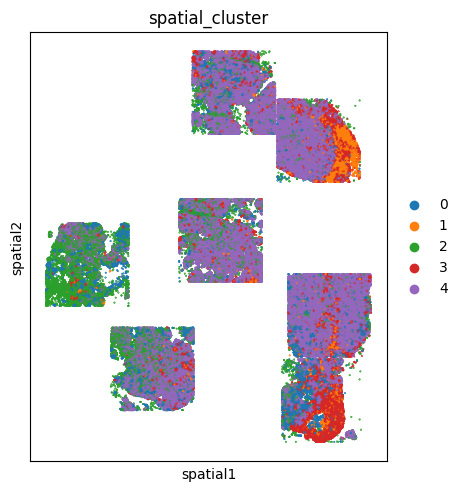

In [26]:
adata.obs['spatial_cluster'] = gmm.predict(adata, use_rep='X_cellcharter')
sq.pl.spatial_scatter(adata, shape=None, size=0.4, color="spatial_cluster")

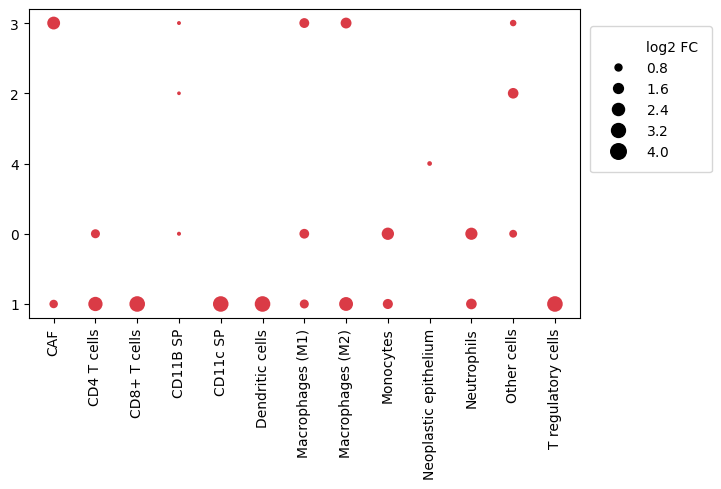

In [40]:
cc.gr.enrichment(adata, group_key='spatial_cluster', label_key='class')
cc.pl.enrichment(adata, group_key='spatial_cluster', label_key='class', figsize=(6,5), fontsize=10, dot_scale=4)

/Users/guoz/miniconda3/envs/cellcharter-env/lib/python3.10/site-packages/anndata/_core/aligned_df.py:68: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)
/Users/guoz/miniconda3/envs/cellcharter-env/lib/python3.10/site-packages/anndata/_core/aligned_df.py:68: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


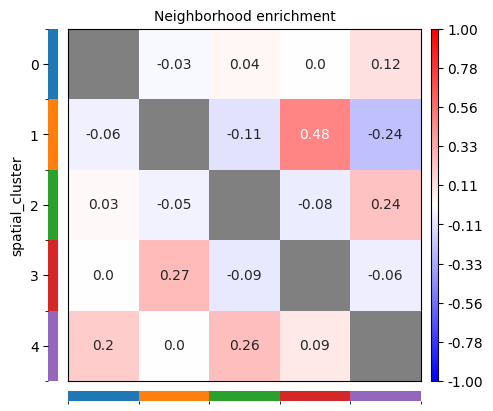

In [34]:
cc.gr.nhood_enrichment(adata, cluster_key='spatial_cluster')
cc.pl.nhood_enrichment(
    adata,
    cluster_key='spatial_cluster',
    annotate=True,
    vmin=-1,
    vmax=1,
    figsize=(4,4),
    fontsize=10,
)

In [35]:
#before saving, remove this one -- giving errors 
adata.uns.pop('spatial_cluster_nhood_enrichment', None)

{'enrichment':           0         1         2         3         4
 0       NaN -0.026333  0.038045  0.004492  0.124247
 1 -0.059578       NaN -0.113649  0.479845 -0.244800
 2  0.029373 -0.052097       NaN -0.077572  0.237201
 3  0.002859  0.266743 -0.092256       NaN -0.064047
 4  0.197267  0.004050  0.257735  0.088475       NaN,
 'params': {'connectivity_key': 'spatial_connectivities',
  'log_fold_change': False,
  'only_inter': True,
  'symmetric': False,
  'pvalues': False,
  'n_perms': None}}

In [36]:
# Count occurrences of each category
cluster_prop = adata.obs['spatial_cluster'].value_counts(normalize=True)

In [38]:
print (cluster_prop)

spatial_cluster
4    0.547527
0    0.140450
2    0.136905
3    0.113299
1    0.061818
Name: proportion, dtype: float64


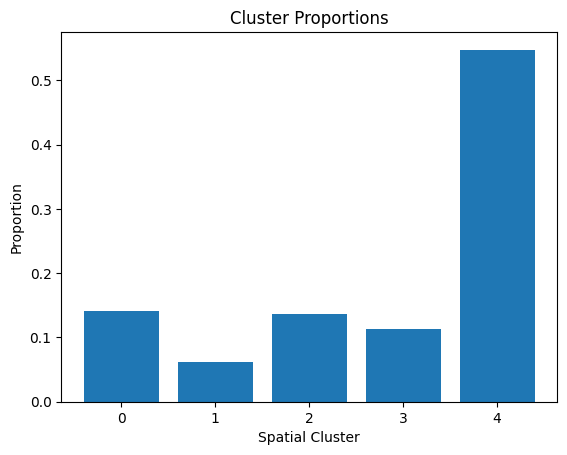

In [39]:
plt.bar(cluster_prop.index.astype(int), cluster_prop.values)
plt.xlabel('Spatial Cluster')
plt.ylabel('Proportion')
plt.title('Cluster Proportions')
plt.show()

In [42]:
# Extract specific columns from obs
extracted_data = adata.obs[['class', 'short_ID', 'Tumor_ID', 'spatial_cluster']]
#extracted_data.to_csv("BT00011_spatial_analysis_extract.csv", index=False)  # Save as CSV

/var/folders/y0/xtkgj_xx1n3fylstssq873p1r3q_9y/T/ipykernel_1171/4100516163.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  agg_data = extracted_data.groupby(["spatial_cluster", "class"]).size().unstack(fill_value=0)


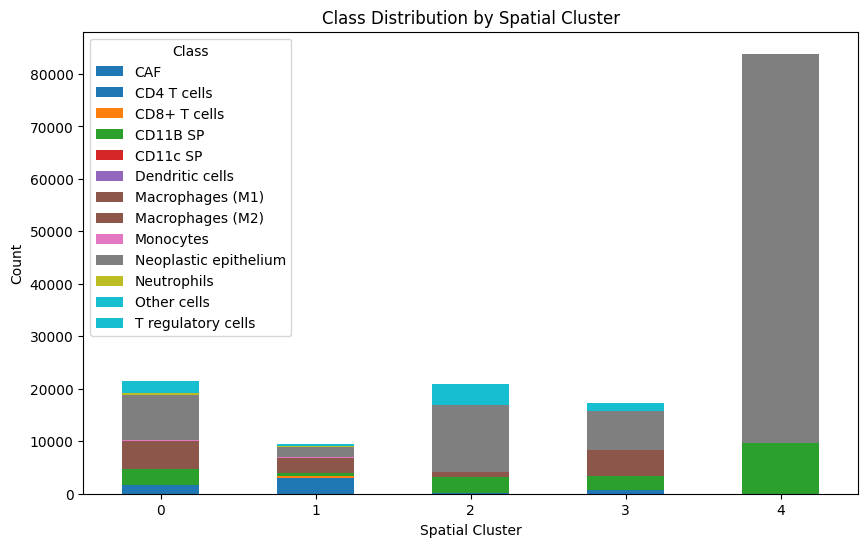

In [43]:
agg_data = extracted_data.groupby(["spatial_cluster", "class"]).size().unstack(fill_value=0)
agg_data.plot(kind="bar", stacked=True, colormap="tab10", figsize=(10,6))
plt.title("Class Distribution by Spatial Cluster")
plt.xlabel("Spatial Cluster")
plt.ylabel("Count")
plt.xticks(rotation=0, ha="center")
plt.legend(title="Class")
plt.show()

/Users/guoz/miniconda3/envs/cellcharter-env/lib/python3.10/site-packages/squidpy/pl/_spatial_utils.py:976: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  _cax = scatter(


Text(0, 0.5, 'Global Coordinate_Y')

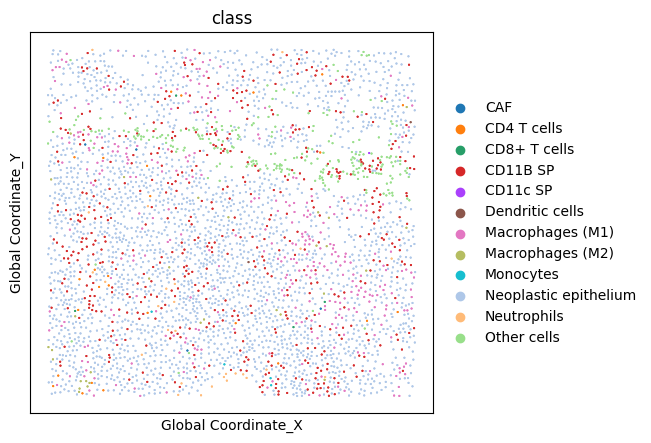

In [44]:
sq.pl.spatial_scatter(
    adata, 
    color='class', 
    shape=None,
    size=1,
    crop_coord=(10000, 1500,11500, 3500 ),
    edges_width= 0.2
    )
plt.xlabel("Global Coordinate_X") 
plt.ylabel("Global Coordinate_Y") 

/Users/guoz/miniconda3/envs/cellcharter-env/lib/python3.10/site-packages/squidpy/pl/_spatial_utils.py:976: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  _cax = scatter(


Text(0, 0.5, 'Global Coordinate_Y')

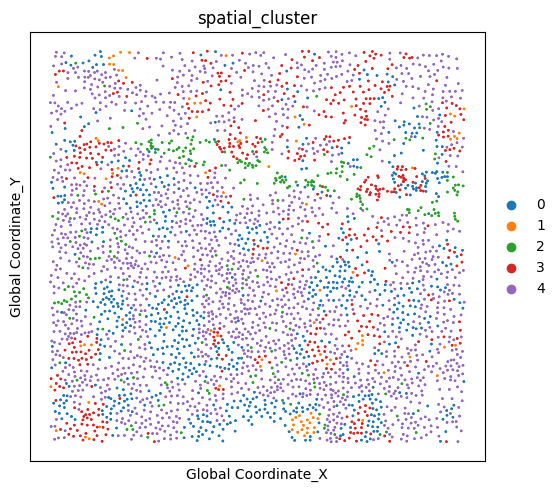

In [47]:
sq.pl.spatial_scatter(
    adata, 
    color='spatial_cluster', 
    shape=None,
    size=3,
    crop_coord=(10000, 1500,11500, 3500 ),
    edges_width= 0.2
    )
plt.xlabel("Global Coordinate_X") 
plt.ylabel("Global Coordinate_Y") 